## Q1

In [45]:
import requests 
import pandas as pd
import numpy as np

#p1,2,3

users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [25]:
#p4

output = users.groupby('occupation').agg({'age': [("mean_age","mean")]})
output

,age
,mean_age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500


In [26]:
#p5

users["male"] = users["gender"].apply(lambda x: 1 if x == "M" else 0)
num = users.groupby('occupation')["male"].sum()
denom = users.groupby('occupation')["gender"].count()
output = (num/denom).sort_values(ascending = False)
output

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [27]:
#p6

output = users.groupby('occupation').agg({'age': [("min_age", "min"), ("max_age","max")]})
output

age        
              min_age max_age
occupation                   
administrator      21      70
artist             19      48
doctor             28      64
educator           23      63
engineer           22      70
entertainment      15      50
executive          22      69
healthcare         22      62
homemaker          20      50
lawyer             21      53
librarian          23      69
marketing          24      55
none               11      55
other              13      64
programmer         20      63
retired            51      73
salesman           18      66
scientist          23      55
student             7      42
technician         21      55
writer             18      60

In [28]:
#p7

output = users.groupby(['occupation', 'gender']).age.mean()
output

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [30]:
#p8

step1 = users.groupby(['occupation']).count()
step2 = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
step3_division_to_get_percentage = step1.div(step2, level = "occupation") * 100

step3_division_to_get_percentage.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

## Q2

In [7]:
import pandas as pd

#p1,2,3

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [8]:
#p4

euro12["Goals"]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [10]:
#p5

euro12["Team"].count()

16

In [11]:
#p6

euro12.shape # 35 columns which is the 2nd element in the tuple

(16, 35)

In [12]:
#p7

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [17]:
#p8

output = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = True)
output

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [20]:
#p9

output = discipline.groupby("Team").agg({"Yellow Cards": [("mean_yellow_cards","mean")]})
output

,Yellow Cards
,mean_yellow_cards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16


In [31]:
#p10

output = euro12[euro12["Goals"] > 6]
output

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [34]:
#p11

output = euro12[euro12["Team"].str.startswith('G')]
output

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [35]:
#p12

euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [36]:
#p13

euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [41]:
#p14

output = euro12.loc[euro12["Team"].isin(["Russia", "England", "Italy"]), ["Team","Shooting Accuracy"]]
# so, whenever the value of euro12["Team"].isin(["Russia", "England", "Italy"]) = True, then the columns will be displayed for them
output

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Q3

In [48]:
#p1

import numpy as np
import pandas as pd

In [52]:
#p2

series1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
series2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series3 = pd.Series(np.random.randint(10000, high=30001, size=100))

In [53]:
#p3

df = pd.concat([series1, series2, series3], axis=1)
df.head()

,0,1,2
0,3,1,19158
1,3,3,18821
2,4,1,14368
3,3,2,16405
4,1,2,13556


In [54]:
#p4

df.rename({0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, axis=1, inplace=True)
df.head()

,bedrs,bathrs,price_sqr_meter
0,3,1,19158
1,3,3,18821
2,4,1,14368
3,3,2,16405
4,1,2,13556


In [61]:
#p5

bigcolumn = pd.concat([series1, series2, series3])
bigcolumn = bigcolumn.to_frame() #inorder to convert to dataframe
bigcolumn

,0
0,3
1,3
2,4
3,3
4,1
...,...
95,19620
96,11250
97,14951
98,11072


In [62]:
#p6

len(bigcolumn) #and this can be seen from the dataframe shape above


300

In [63]:
#p7

bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,3
1,3
2,4
3,3
4,1
...,...
295,19620
296,11250
297,14951
298,11072


### Q4

In [64]:
#p1

import datetime
import pandas as pd

In [65]:
#p2,3

data = pd.read_csv('wind.txt', sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [67]:
#p4

def fixing(x):
  year = x.year - 100 if x.year >= 1989 else x.year #I chose 1989 since the problem exists after this date

  return datetime.date(year, x.month, x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fixing)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [68]:
#p5

data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"]) #datetime64 data type

data = data.set_index('Yr_Mo_Dy')

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [70]:
#p6

output = data.isnull().sum()
output

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [71]:
#p7

output_notnull = data.notnull().sum()
output_notnull

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [74]:
#p8

num = data.sum()
denom = data.notna().sum()
output = num / denom
output

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [76]:
final_output = num.sum() / denom.sum()
final_output

10.227883764282167

In [79]:
#p9

loc_stats = data.describe(percentiles=[]) #percentiles=[] to remove the percentiles since they are not mentioned in the question
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [81]:
#p10

day_stats = pd.DataFrame()

day_stats['mean'] = data.mean(axis=1) #axis=1 to pass on rows
day_stats['std'] = data.std(axis=1)
day_stats['min'] = data.min(axis=1) 
day_stats['max'] = data.max(axis=1)  

day_stats.head()

,mean,std,min,max
Yr_Mo_Dy,,,,
1961-01-01,13.018182,2.808875,9.29,18.50
1961-01-02,11.336364,3.188994,6.50,17.54
1961-01-03,11.641818,3.681912,6.17,18.50
1961-01-04,6.619167,3.198126,1.79,11.75
1961-01-05,10.630000,2.445356,6.17,13.33


In [82]:
#p11

output = data.loc[data.index.month == 1] #1 for january
get_mean = output.mean()
get_mean

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [83]:
#p12

output = data.groupby(data.index.to_period('A')).mean() # 'A' for year frequency
output

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [84]:
#p13

output = data.groupby(data.index.to_period('M')).mean() # 'M' for month frequency
output

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [85]:
#p14

output = data.groupby(data.index.to_period('W')).mean() # 'W' for week frequency
output

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [86]:
#p15

weekly = data.resample('W').agg(['min','max','mean','std'])

output = weekly.loc[weekly.index[1:53], "RPT":"MAL"]#starting from 1 since it's January 2

output.head()

RPT                               VAL                    \
              min    max       mean       std   min    max       mean   
Yr_Mo_Dy                                                                
1961-01-08  10.58  18.50  13.541429  2.631321  6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392  3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402  3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061  9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408  9.46  24.21  15.460000   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  

[5 rows x 48 columns]

### Q5

In [87]:
#p1

import numpy as np
import pandas as pd 

In [89]:
#p2,3,4

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [90]:
#p5

len(chipo)

4622

In [92]:
#p6

chipo.shape[1]

5

In [93]:
#p7

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [94]:
#p8

output = chipo.index
output

RangeIndex(start=0, stop=4622, step=1)

In [96]:
#p9

output = chipo.groupby('item_name').sum()
output = output.sort_values(['quantity'], ascending = False)
output.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [ ]:
#p10

#from the previous part we can see that it's 761

In [97]:
#p11

output = chipo.groupby('choice_description').sum()
output = output.sort_values(['quantity'], ascending = False)
output.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [98]:
#p12

output = chipo.quantity.sum()
output

4972

In [99]:
#p13,b

chipo['item_price'].dtype

dtype('O')

In [100]:
#p13,a,c

func = lambda x: float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(func)

In [101]:
#p13,d

chipo['item_price'].dtype

dtype('float64')

In [103]:
#p14

mult = (chipo['item_price'] * chipo['quantity'])
output = mult.sum()
output #we can consider the output as $39237.02

39237.02

In [105]:
#p15

output = chipo['order_id'].value_counts().count()
output #1834 orders

1834

In [107]:
#p16

chipo['revenue'] = chipo['item_price'] * chipo['quantity']

sum = chipo.groupby('order_id').sum()
average = sum.mean()
output = average['revenue']
output # $21.3942

21.394231188658654

In [108]:
#p17

all_items_counts = chipo['item_name'].value_counts()
output = all_items_counts.count()
output

50

### Q6

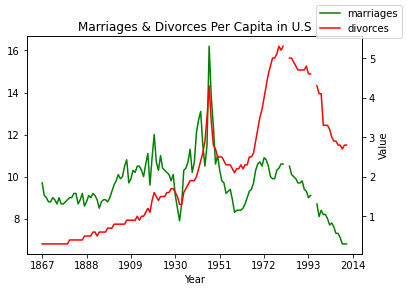

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriages = data['Marriages_per_1000'].values
divorces = data['Divorces_per_1000'].values
set_of_years = data['Year'].values

df = pd.DataFrame({'Year':list(set_of_years), 'marriages':list(marriages), 'divorces':list(divorces)})

ax = df.plot(x='Year', y='marriages', legend=False, color='g')
ax = ax.twinx()
df.plot(x='Year', y='divorces', ax=ax, legend=False, color="r")
ax.figure.legend()
plt.xticks(np.arange(1867, 2015, 21))
plt.ylabel('Value')
plt.title("Marriages & Divorces Per Capita in U.S")
plt.show()


### Q7

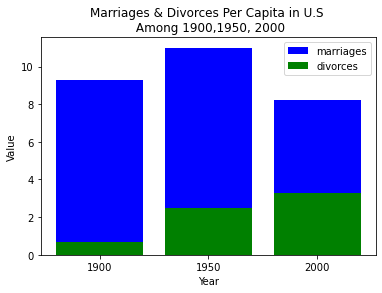

In [173]:
data_cleaned = data[data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

set_of_years = data_cleaned['Year'].values
marriages = data_cleaned['Marriages_per_1000'].values
divorces = data_cleaned['Divorces_per_1000'].values

df = pd.DataFrame({'Year':list(set_of_years), 'marriages':list(marriages), 'divorces':list(divorces)})
x = ['1900', '1950', '2000']
ax = plt.subplot(111)
ax.bar(x, df['marriages'], color='b', label='marriages')
ax.bar(x, df['divorces'], color='g', label='divorces')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Year')
plt.title("Marriages & Divorces Per Capita in U.S \n Among 1900,1950, 2000")

plt.show()

### Q8

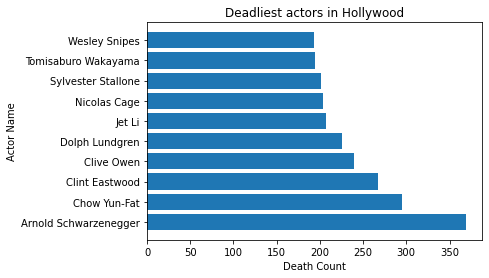

In [188]:
data = pd.read_csv('actor_kill_counts.csv')

plt.barh(data['Actor'], data['Count'].sort_values(ascending=False))
plt.xlabel("Death Count")
plt.ylabel("Actor Name")  
plt.title("Deadliest actors in Hollywood")
plt.show()

### Q9

In [198]:
import plotly.express as px

data = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = data[data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

ass_n = len(assassinated_emperors)
other_deaths = len(data) - ass_n #so we can figure out the number of the 2nd category

vals = [other_deaths, ass_n]
labels = ['Other Deaths','Assassinated']
figure = px.pie(labels, values = vals, names = labels,title="Fraction of All Roman Emperors that Were Assassinated.")
figure

### Q10

Text(0, 0.5, 'Computer Science Doctorates Awarded (US)')

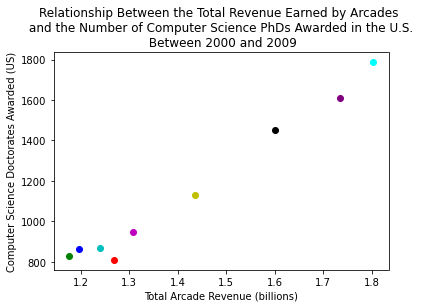

In [237]:
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade = data['Total Arcade Revenue (billions)'].values
doctorates = data['Computer Science Doctorates Awarded (US)'].values

colors = ['b' , 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'aqua', 'purple', 'grey']
fig, ax = plt.subplots()

for i in range(len(data)):
    ax.scatter(arcade[i], doctorates[i], color=colors[i])

ax.set_title('Relationship Between the Total Revenue Earned by Arcades \n and the Number of Computer Science PhDs Awarded in the U.S. \n Between 2000 and 2009')
ax.set_xlabel('Total Arcade Revenue (billions)')
ax.set_ylabel('Computer Science Doctorates Awarded (US)')
